In [297]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
from meteostat import Stations, Daily, Hourly
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from fancyimpute import KNN
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [5]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "114186",
    'client_secret': '535f4e9fce8216e83d23ecf9644b9b3c00f05ba5',
    'refresh_token': '3f8ab023c1f397d9fa98ed15ca94977267deb54c',
    'grant_type': "refresh_token",
    'f': 'json'
}

# First API call to request access token
# Access tokens expire, so this saves you manual work of regenerating access tokens manually
print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

# Make API request to retrieve the last 400 activities
header = {'Authorization': 'Bearer ' + access_token}
param1 = {'per_page': 200, 'page': 1}
param2 = {'per_page': 200, 'page': 2}
param3 = {'per_page': 200, 'page': 3}
my_dataset1 = requests.get(activites_url, headers=header, params=param1).json()
my_dataset2 = requests.get(activites_url, headers=header, params=param2).json()
my_dataset3 = requests.get(activites_url, headers=header, params=param3).json()

print(my_dataset1[0]["name"])
print(my_dataset1[0]["map"]["summary_polyline"])

print(my_dataset2[0]["name"])
print(my_dataset2[0]["map"]["summary_polyline"])

print(my_dataset3[0]["name"])
print(my_dataset3[0]["map"]["summary_polyline"])

Requesting Token...

Access Token = 6d556570d3457bce0c6b68f694031ffaf2ea41c7

Richmond Marathon 2023
w_ddFretwMwBnEqChFmCvEq@~AwInQqDpGmCbGaFhJ}LzVyA`CmApCuMhW_EtIqAvB{IjQgFnJgAvC}AxCUx@H^`InDG`@oElI{_@|v@yQt^{FnK_I|OqBvEEp@tAnAnJrGrJjHtCdBdE|C|JzG|@`AOp@_BdDuI~UeEdKkLx[wEpLoE`M_@fBFxKXzHFr@PZxUvDb@TQdGFbBpCvMl@xGFnHMx@DhCMhDPvRClFNjG|@dN`AzFd@rAbAxFpAfDfBlCpC`CtAp@nBf@pc@vEfDXb@MBo@Q}@]_@eBs@SwAHcBSwCa@g@@LGkAeAeFG_JQq@a@{E@yCLqBB{IYkJYiDLkABkBt@qF^kAv@yAj@k@Xw@hA_Br@s@`CwAbH}BdGkDjBcBjBkDnBkFl@kAbB_B~Aa@vER@_DTeBjAkBfCuChBoDp@wBH}@X{@bA[XHbGnDbCpB`F~B|Ao@fJsGp@gDZk@xCsJX[xDfBlCP`CMrANxAv@zBbBh@HjCmNtAsJz@yHf@kBn@{Ap@mAnAyApEeD`EmBfFkEx@iAt@cB`DyIrAyCfFgIf@SdBeDlBwBdFkJdB{EjGmOt@qAbOq]z@sEtBiShBoNj@sCnO}a@tA}ExAiGhAeGLuDMm@m@wAeG{TiC_Ie@}Bw@yB_AcEkBiFIm@cCqHo@qCw@qBiGwTe@eAi@H_DnBaIrDi@wC}EqQRuB`@{@n@c@f@C^TTn@Ap@Uj@c@Vk@FuBGgj@_PoGeAqXDcOQaDFyJa@cHE_B@a@^QhBQnEN~EMzEDnAIvRKz@eCxIeDlNeCbIw@zDoJf^{@|DoFdSaApEq@hBAh@Sz@q@rBWN}HqDoEkB}H}Dw@QcGkC}DwBo^oPcUaKw@SkYaN{@SaFwBoI}Dk@m@yMeFsDJwH

In [150]:
# Flatten nested JSON response into a Dataframe
activities1 = pd.json_normalize(my_dataset1)
activities2 = pd.json_normalize(my_dataset2)
activities3 = pd.json_normalize(my_dataset3)

# Combine into one dataframe
activities = pd.concat([activities1, activities2, activities3])

print("Dataframe shape: ", activities.shape, "\n")
print("Dataframe columns: \n", activities.columns)
display(activities[["distance","total_elevation_gain", "start_date_local", "start_latlng"]].head())
activities[['start_latlng','location_city', 'location_state', 'average_temp', 'athlete.resource_state']]


Dataframe shape:  (600, 55) 

Dataframe columns: 
 Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'has_heartrate', 'average_heartrate',
       'max_heartrate', 'heartrate_opt_out', 'display_hide_heartrate_option',
       'elev_high', 'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'suffer_score', 'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'ave

,distance,total_elevation_gain,start_date_local,start_latlng
0,42360.6,198.3,2023-11-11T07:00:10Z,"[37.54508150741458, -77.44106045924127]"
1,1158.2,0.0,2023-11-11T06:26:00Z,"[37.55154202692211, -77.44945795275271]"
2,6463.0,55.5,2023-11-10T09:52:33Z,"[38.88138284906745, -77.10249150171876]"
3,8868.7,100.8,2023-11-08T13:29:36Z,"[30.254413532093167, -97.74713435210288]"
4,14664.8,138.5,2023-11-07T16:52:39Z,"[30.253916485235095, -97.74717961438]"


,start_latlng,location_city,location_state,average_temp,athlete.resource_state
0,"[37.54508150741458, -77.44106045924127]",None,None,NaN,1
1,"[37.55154202692211, -77.44945795275271]",None,None,NaN,1
2,"[38.88138284906745, -77.10249150171876]",None,None,NaN,1
3,"[30.254413532093167, -97.74713435210288]",None,None,NaN,1
4,"[30.253916485235095, -97.74717961438]",None,None,NaN,1
...,...,...,...,...,...
195,"[38.93482611514628, -119.93986886925995]",None,None,NaN,1
196,"[30.272296825423837, -97.63271827250719]",None,None,NaN,1
197,"[30.272522550076246, -97.63264912180603]",None,None,NaN,1
198,"[30.25947293266654, -97.75364558212459]",None,None,NaN,1


In [7]:
# Create DataFrame with specific columns of interest
cols = ['start_date_local', 'sport_type', 'start_latlng', 'distance', 'moving_time',  'total_elevation_gain', 'type', 'average_speed', 
        'max_speed','average_cadence', 'average_heartrate', 'max_heartrate', 'elev_high']

my_activities = activities[cols]

# Break Start Date into Time + Date columns
my_activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
my_activities['start_time'] = my_activities['start_date_local'].dt.time
my_activities['start_date_local'] = my_activities['start_date_local'].dt.date
my_activities['start_lat'] = round(my_activities['start_latlng'].str[0], 2)
my_activities['start_lng'] = round(my_activities['start_latlng'].str[1], 2)

my_activities.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,start_date_local,sport_type,start_latlng,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng
0,2023-11-11,Run,"[37.54508150741458, -77.44106045924127]",42360.6,10966,198.3,Run,3.863,5.750,83.0,168.0,191.0,84.1,07:00:10,37.55,-77.44
1,2023-11-11,Run,"[37.55154202692211, -77.44945795275271]",1158.2,422,0.0,Run,2.745,8.052,85.7,113.5,123.0,54.8,06:26:00,37.55,-77.45
2,2023-11-10,Run,"[38.88138284906745, -77.10249150171876]",6463.0,2128,55.5,Run,3.037,4.041,84.2,145.8,165.0,84.7,09:52:33,38.88,-77.10
3,2023-11-08,Run,"[30.254413532093167, -97.74713435210288]",8868.7,2791,100.8,Run,3.178,5.486,80.7,147.2,164.0,203.2,13:29:36,30.25,-97.75
4,2023-11-07,Run,"[30.253916485235095, -97.74717961438]",14664.8,4163,138.5,Run,3.523,7.044,81.9,153.4,178.0,186.0,16:52:39,30.25,-97.75


In [8]:
# Data Prep for Model Training

# Keep only sport_type == 'Run'
run_activities = my_activities.loc[my_activities['sport_type'] == 'Run']
run_activities = run_activities.drop(columns=['sport_type', 'start_latlng'])
print("Run Activities Shape:",run_activities.shape)

# Find date range and location list for querying external weather data
min_date, max_date = run_activities['start_date_local'].min(), run_activities['start_date_local'].max()
run_locations = run_activities.loc[:,['start_lat', 'start_lng']].drop_duplicates().values

print("Min Activity Date:",min_date,"\nMax Activitiy Date:", max_date)
run_activities.head()

Run Activities Shape: (489, 14)
Min Activity Date: 2022-03-14 
Max Activitiy Date: 2023-11-11


,start_date_local,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng
0,2023-11-11,42360.6,10966,198.3,Run,3.863,5.750,83.0,168.0,191.0,84.1,07:00:10,37.55,-77.44
1,2023-11-11,1158.2,422,0.0,Run,2.745,8.052,85.7,113.5,123.0,54.8,06:26:00,37.55,-77.45
2,2023-11-10,6463.0,2128,55.5,Run,3.037,4.041,84.2,145.8,165.0,84.7,09:52:33,38.88,-77.10
3,2023-11-08,8868.7,2791,100.8,Run,3.178,5.486,80.7,147.2,164.0,203.2,13:29:36,30.25,-97.75
4,2023-11-07,14664.8,4163,138.5,Run,3.523,7.044,81.9,153.4,178.0,186.0,16:52:39,30.25,-97.75


In [337]:
print(run_locations[0:5])

[[ 37.55 -77.44]
 [ 37.55 -77.45]
 [ 38.88 -77.1 ]
 [ 30.25 -97.75]
 [ 33.18 -96.67]]


In [10]:
# Get unique list of weather stations from run locations
weather_stations = pd.DataFrame()
run_loc_dict = {}
for location in run_locations:
    stations = Stations()
    nearby_station = stations.nearby(location[0], location[1]).fetch(1)
    run_loc_dict[str(location)] = nearby_station.index[0]
    weather_stations = pd.concat([weather_stations, nearby_station])

weather_stations = weather_stations.drop_duplicates(subset='name')
print("weather_stations shape:",weather_stations.shape)
print(run_loc_dict)
weather_stations.head()


weather_stations shape: (57, 16)
{'[ 37.55 -77.44]': '72401', '[ 37.55 -77.45]': '72401', '[ 38.88 -77.1 ]': '72405', '[ 30.25 -97.75]': '72254', '[ 33.18 -96.67]': 'KTKI0', '[ 33.17 -96.67]': 'KTKI0', '[ 33.17 -96.66]': 'KTKI0', '[ 30.26 -97.75]': '72254', '[ 29.44 -98.48]': '72253', '[  39.66 -104.94]': 'KAPA0', '[  39.77 -105.04]': '72469', '[ 30.24 -97.72]': '74745', '[  45.59 -122.33]': 'KTTD0', '[  45.97 -123.42]': '72791', '[  45.61 -122.8 ]': 'KVUO0', '[  45.31 -121.84]': 'KCZK0', '[ 29.61 -98.59]': '72253', '[ 29.44 -98.56]': 'KSKF0', '[ 29.44 -98.55]': 'KSKF0', '[ 29.43 -98.48]': 'KSSF0', '[ 33.86 -96.66]': 'KGYI0', '[ 29.4  -98.49]': 'KSSF0', '[ 41.95 -87.65]': 'KCGX0', '[-33.02 -71.56]': 'SCRD0', '[-22.91 -68.2 ]': '85432', '[-33.43 -70.64]': '85577', '[  39.74 -104.94]': '72469', '[  39.74 -104.96]': '72469', '[  40.65 -111.49]': 'K36U0', '[  40.65 -111.5 ]': 'K36U0', '[ 30.28 -97.75]': '72254', '[ 30.29 -97.75]': '72254', '[ 30.24 -97.75]': '72254', '[ 29.44 -98.49]': '72

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
72401,Richmond International Airport,US,VA,72401,KRIC,37.5167,-77.3167,51.0,America/New_York,1942-09-24,2023-11-11,1939-03-01,2023-11-05,1939-01-01,2022-01-01,11485.516999
72405,Washington National Airport,US,DC,72405,KDCA,38.8500,-77.0333,5.0,America/New_York,1936-09-01,2023-11-11,1936-09-01,2023-11-06,1936-01-01,2022-01-01,6669.082961
72254,Camp Mabry/Austin City Asos,US,TX,72254,KATT,30.3167,-97.7667,201.0,America/Chicago,2000-01-01,2023-11-11,1938-06-01,2023-11-04,1938-01-01,2022-01-01,7588.073798
KTKI0,McKinney,US,TX,<NA>,KTKI,33.1779,-96.5905,179.0,America/Chicago,2006-01-01,2023-11-11,2006-01-01,2022-04-25,2006-01-01,2022-01-01,7402.455335
72253,San Antonio International Airport,US,TX,72253,KSAT,29.5333,-98.4667,247.0,America/Chicago,1946-08-14,2023-11-11,1946-08-14,2023-11-06,1946-01-01,2022-01-01,10454.051693


In [11]:
# Retrieving Weather Data from Nearby Stations

# Create dictionary to hold dataframes of weather data
weather_df_dict = {}
for coord, station_id in run_loc_dict.items():
    weather_df_dict[station_id] = pd.DataFrame()

for idx, station in weather_stations.iterrows():
    # Daily Weather
    weather_df_dict[idx] = Daily(idx, start=datetime.combine(min_date, datetime.min.time()), end=datetime.combine(max_date, datetime.min.time())).fetch()

    # Hourly Weather
    #weather_df_dict[idx] = Hourly(idx, start=datetime.combine(min_date, datetime.min.time()), end=datetime.combine(max_date, datetime.min.time())).fetch()

print(weather_df_dict['72469'])

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2022-03-14   6.2  -1.1  16.7   0.0   0.0  348.0  14.4   NaN  1019.6   NaN
2022-03-15   8.5  -2.2  12.2   0.0   0.0  246.0  10.0   NaN  1018.6   NaN
2022-03-16   6.5  -2.2  20.0   0.0   0.0  338.0  14.4   NaN  1011.6   NaN
2022-03-17   1.6  -0.6  12.2  14.0  76.0    8.0  15.1   NaN  1018.9   NaN
2022-03-18   2.8  -5.0   1.7   5.3  76.0  236.0   9.8   NaN  1020.2   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2023-11-07  12.7   7.0  21.1   0.0   NaN  230.0  14.7   NaN  1006.2   NaN
2023-11-08   4.4   0.5   7.7   1.4   NaN  358.0  14.9   NaN  1017.7   NaN
2023-11-09   2.5  -0.9   7.9   0.0   NaN   22.0   7.2   NaN  1025.1   NaN
2023-11-10   2.0  -4.0   9.4   0.0   NaN  144.0   5.2   NaN  1021.9   NaN
2023-11-11   4.2  -2.6  12.2   0.0   NaN  211.0   9.4   NaN  1020.8   NaN

[608 rows x 10 columns]


In [321]:
print(weather_df_dict)

{'72401':             tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2022-03-14   6.8  -2.7  16.1   0.0   0.0  183.0   8.6   NaN  1030.2   NaN
2022-03-15  12.0   3.9  21.7   0.0   0.0  204.0  14.8   NaN  1025.5   NaN
2022-03-16  13.7   5.0  22.2   0.0   0.0  125.0  10.1   NaN  1021.6   NaN
2022-03-17  13.7  10.0  15.0   4.1   0.0  352.0  13.7   NaN  1013.7   NaN
2022-03-18  15.1   6.7  24.4   0.0   0.0  172.0  10.8   NaN  1016.3   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2023-11-07  16.9  10.6  27.8   0.0   0.0  224.0  13.0   NaN  1012.6   NaN
2023-11-08  15.6   8.9  21.1   0.0   0.0   54.0   7.9   NaN  1017.6   NaN
2023-11-09  16.4   9.4  28.3   0.0   0.0  199.0  12.6   NaN  1013.1   NaN
2023-11-10  18.5   5.0  18.9   0.0   0.0    6.0  15.8   NaN  1022.0   NaN
2023-11-11   8.1   2.2  15.6   0.0   NaN   27.0   7.0   NaN  1027.8   NaN

[608 rows x 10 columns], '7

In [12]:
# Add weather data to run_activities dataframe
run_activities["weather_station"] = None
run_activities["avg_temp"] = None
for idx, activity in run_activities.iterrows():
    dict_key = "[ " + str(activity['start_lat']) + " " + str(activity['start_lng']) + "]"
    if dict_key in run_loc_dict:
        weather_df = weather_df_dict[run_loc_dict[dict_key]]
        try:
            run_activities.at[idx,"weather_station"] = run_loc_dict[dict_key]
            run_activities.at[idx,"avg_temp"] = weather_df.loc[str(activity["start_date_local"])]["tavg"]
        except:
            # weather not found for date / station
            run_activities.at[idx,"weather_station"] = run_loc_dict[dict_key]

# Check null count of each column
print(run_activities.isnull().sum())

run_activities
    

start_date_local         0
distance                 0
moving_time              0
total_elevation_gain     0
type                     0
average_speed            0
max_speed                0
average_cadence         16
average_heartrate       15
max_heartrate           15
elev_high                7
start_time               0
start_lat                7
start_lng                7
weather_station         13
avg_temp                13
dtype: int64


,start_date_local,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng,weather_station,avg_temp
0,2023-11-11,42360.6,10966,198.3,Run,3.863,5.750,83.0,168.0,191.0,84.1,07:00:10,37.55,-77.44,72253,18.1
1,2023-11-11,1158.2,422,0.0,Run,2.745,8.052,85.7,113.5,123.0,54.8,06:26:00,37.55,-77.45,72253,17.0
2,2023-11-10,6463.0,2128,55.5,Run,3.037,4.041,84.2,145.8,165.0,84.7,09:52:33,38.88,-77.10,72253,21.4
3,2023-11-08,8868.7,2791,100.8,Run,3.178,5.486,80.7,147.2,164.0,203.2,13:29:36,30.25,-97.75,72253,25.6
4,2023-11-07,14664.8,4163,138.5,Run,3.523,7.044,81.9,153.4,178.0,186.0,16:52:39,30.25,-97.75,72253,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2022-03-18,10459.5,3325,45.3,Run,3.146,4.118,79.9,141.3,173.0,1923.7,17:20:23,38.95,-119.96,KCGI0,16.9
196,2022-03-17,9711.7,3160,81.2,Run,3.073,3.611,78.8,156.5,183.0,171.7,06:48:50,30.27,-97.63,74745,16.3
197,2022-03-16,12917.3,3901,121.8,Run,3.311,3.882,80.7,150.6,165.0,171.7,07:20:01,30.27,-97.63,74745,15.8
198,2022-03-15,9878.6,2944,59.2,Run,3.355,4.890,79.9,146.7,179.0,162.2,19:07:42,30.26,-97.75,72254,18.3


In [33]:
# display rows with one or more null values
print(str(run_activities[run_activities.isna().any(axis=1)].shape[0]) + " rows with missing values.")
run_activities[run_activities.isna().any(axis=1)]

31 rows with missing values.


,start_date_local,distance,moving_time,total_elevation_gain,type,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,start_time,start_lat,start_lng,weather_station,avg_temp
123,2023-07-22,10285.2,2606,87.4,Run,3.947,5.845,83.1,151.5,174.0,632.1,17:32:59,-33.43,-70.64,None,None
125,2023-07-20,6780.1,2334,62.7,Run,2.905,4.158,78.3,130.9,145.0,638.3,17:32:01,-33.43,-70.64,None,None
192,2023-05-20,6684.5,1585,8.7,Run,4.217,5.782,82.2,175.6,192.0,7.4,09:02:39,27.70,-97.29,None,None
63,2023-03-19,0.0,3,0.0,Run,0.000,0.000,NaN,92.0,111.0,NaN,00:17:56,NaN,NaN,72253,29.0
77,2023-03-01,9490.4,2646,6.0,Run,3.587,6.276,80.1,156.2,176.0,6.6,17:36:51,52.37,4.87,None,None
119,2023-01-26,8554.8,2966,132.8,Run,2.884,4.470,77.8,134.7,153.0,683.5,15:44:49,50.09,-123.00,None,None
125,2023-01-21,1915.0,541,0.0,Run,3.540,4.195,80.2,148.2,177.0,NaN,16:27:05,NaN,NaN,None,None
179,2022-11-21,1448.4,432,0.0,Run,3.353,0.000,NaN,NaN,NaN,NaN,17:11:29,NaN,NaN,72254,21.9
182,2022-11-18,12900.6,3500,98.5,Run,3.686,5.554,NaN,NaN,NaN,203.6,12:50:24,30.28,-97.75,74745,19.0
4,2022-10-24,2896.8,710,0.0,Run,4.080,0.000,NaN,NaN,NaN,NaN,19:16:21,NaN,NaN,72253,22.1


In [37]:
# Pre-processing
# Handle Null values via Imputation
run_activities["avg_temp"] = run_activities["avg_temp"].astype(float)
run_activities[["average_cadence","average_heartrate", "max_heartrate", "avg_temp"]].mean()
#run_activities.dtypes
# avg cadence

# avg_hr

# max_hr

# avg_temp

# handle null values via interpolation (assumes linear distribution, )
# Standardize numerical columns (total_elevation_gain, max_heart_rate

# Handle start_time ??

average_cadence       79.175264
average_heartrate    150.196835
max_heartrate        171.069620
avg_temp              22.566597
dtype: float64

In [38]:
# handle via interpolation
run_activities_interpolated = run_activities.interpolate()
print(run_activities_interpolated.isnull().sum())

start_date_local         0
distance                 0
moving_time              0
total_elevation_gain     0
type                     0
average_speed            0
max_speed                0
average_cadence          0
average_heartrate        0
max_heartrate            0
elev_high                0
start_time               0
start_lat                0
start_lng                0
weather_station         13
avg_temp                 0
dtype: int64


,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,start_lng,avg_temp,date-time,year,month,day,hour,min,sec,total_seconds
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,-77.44,18.1,2023-11-11 07:00:10,2023,11,11,7,0,10,25210
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,-77.45,17.0,2023-11-11 06:26:00,2023,11,11,6,26,0,23160
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,-77.10,21.4,2023-11-10 09:52:33,2023,11,10,9,52,33,35553
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,-97.75,25.6,2023-11-08 13:29:36,2023,11,8,13,29,36,48576
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,-97.75,22.1,2023-11-07 16:52:39,2023,11,7,16,52,39,60759


<Axes: >

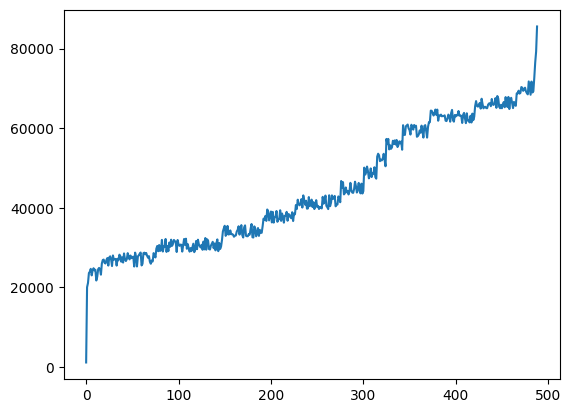

In [86]:
# handling categorical values
# start_date_local, type, start_time, weather_station
# drop type (all "Run")
# drop weather station
run_activities_encoded_temp = run_activities.drop(labels=["type", "weather_station"], axis=1)

#run_activities_encoded["date-time"] = run_activities_encoded["start_date_local"] + run_activities_encoded["start_time"]
run_activities_encoded_temp.loc[:,"date-time"] = pd.to_datetime(run_activities_encoded_temp.start_date_local.astype(str)+ " " + run_activities_encoded_temp.start_time.astype(str ))


run_activities_encoded_temp["year"] = run_activities_encoded_temp["date-time"].dt.year
run_activities_encoded_temp["month"] = run_activities_encoded_temp["date-time"].dt.month
run_activities_encoded_temp["day"] = run_activities_encoded_temp["date-time"].dt.day
run_activities_encoded_temp["hour"] = run_activities_encoded_temp["date-time"].dt.hour
run_activities_encoded_temp["min"] = run_activities_encoded_temp["date-time"].dt.minute
run_activities_encoded_temp["sec"] = run_activities_encoded_temp["date-time"].dt.second
run_activities_encoded_temp["total_seconds"] = run_activities_encoded_temp["hour"]*60*60 +  run_activities_encoded_temp["min"]*60 +  run_activities_encoded_temp["sec"]

#run_activities_encoded = run_activities.drop(labels=["start_date_local", "start_time"], axis=1)

display(run_activities_encoded_temp.head())

# encoding cyclical feature - 24hr time
run_activities_encoded_temp_time = run_activities_encoded_temp.sort_values("hour").reset_index(drop=True)
run_activities_encoded_temp_time.total_seconds.plot()

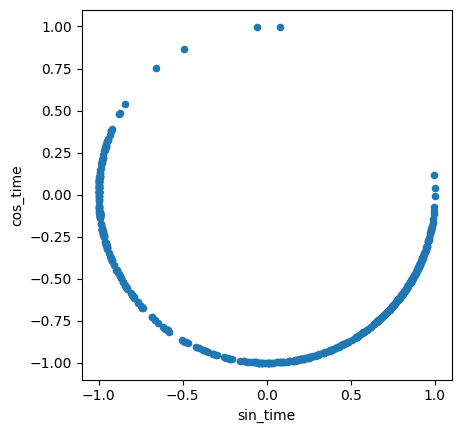

In [90]:
seconds_in_day = 24*60*60
run_activities_encoded_temp_time["sin_time"] = np.sin(2*np.pi*run_activities_encoded_temp_time.total_seconds/seconds_in_day)
run_activities_encoded_temp_time["cos_time"] = np.cos(2*np.pi*run_activities_encoded_temp_time.total_seconds/seconds_in_day)
run_activities_encoded_temp_time[["sin_time", "cos_time"]].head()
run_activities_encoded_temp_time.plot.scatter("sin_time", "cos_time").set_aspect("equal")

In [91]:
run_activities_encoded_temp["sin_time"] = np.sin(2*np.pi*run_activities_encoded_temp.total_seconds/seconds_in_day)
run_activities_encoded_temp["cos_time"] = np.cos(2*np.pi*run_activities_encoded_temp.total_seconds/seconds_in_day)
run_activities_encoded_temp.head()

,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,date-time,year,month,day,hour,min,sec,total_seconds,sin_time,cos_time
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,2023-11-11 07:00:10,2023,11,11,7,0,10,25210,0.965737,-0.259521
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,2023-11-11 06:26:00,2023,11,11,6,26,0,23160,0.993572,-0.113203
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,2023-11-10 09:52:33,2023,11,10,9,52,33,35553,0.527883,-0.849317
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,2023-11-08 13:29:36,2023,11,8,13,29,36,48576,-0.381070,-0.924546
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,2023-11-07 16:52:39,2023,11,7,16,52,39,60759,-0.957130,-0.289658


In [93]:
def sin_transformer(period):
    np.sin(2*np.pi*run_activities_encoded_temp.total_seconds/seconds_in_day)
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,sec,total_seconds,sin_time,cos_time,month_sin,month_cos,day_sin,day_cos,sec_sin,sec_cos
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,10,25210,0.965737,-0.259521,-0.5,0.866025,0.790776,-0.612106,0.965737,-0.259521
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,0,23160,0.993572,-0.113203,-0.5,0.866025,0.790776,-0.612106,0.993572,-0.113203
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,33,35553,0.527883,-0.849317,-0.5,0.866025,0.897805,-0.440394,0.527883,-0.849317
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,36,48576,-0.381070,-0.924546,-0.5,0.866025,0.998717,-0.050649,-0.381070,-0.924546
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,39,60759,-0.957130,-0.289658,-0.5,0.866025,0.988468,0.151428,-0.957130,-0.289658


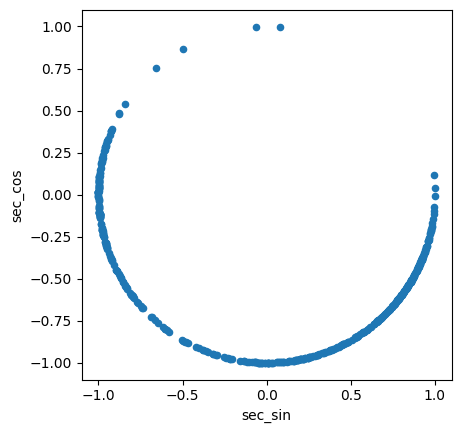

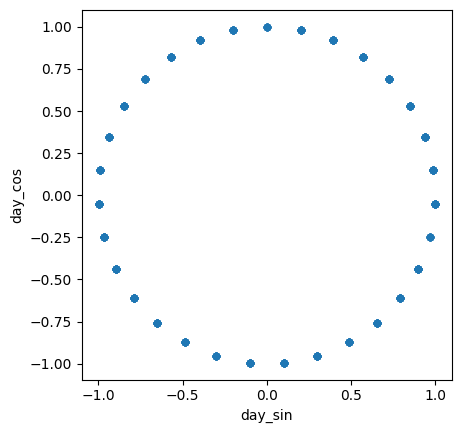

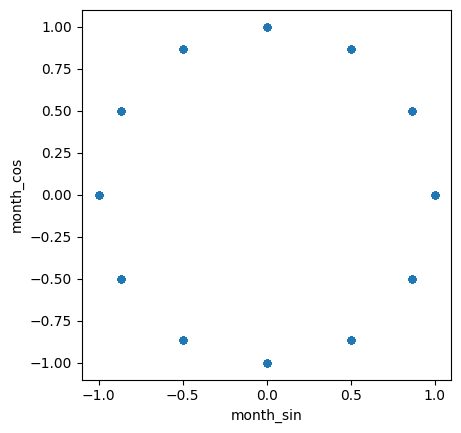

In [135]:
run_activities_encoded_2 = run_activities_encoded_temp.copy()

run_activities_encoded_2["month_sin"] = np.sin(2*np.pi*run_activities_encoded_2.month/12)
run_activities_encoded_2["month_cos"] = np.cos(2*np.pi*run_activities_encoded_2.month/12)

run_activities_encoded_2["day_sin"] = np.sin(2*np.pi*run_activities_encoded_2.day/31)
run_activities_encoded_2["day_cos"] = np.cos(2*np.pi*run_activities_encoded_2.day/31)

run_activities_encoded_2["sec_sin"] = np.sin(2*np.pi*run_activities_encoded_2.total_seconds/seconds_in_day)
run_activities_encoded_2["sec_cos"] = np.cos(2*np.pi*run_activities_encoded_2.total_seconds/seconds_in_day)

run_activities_encoded_2.plot.scatter("sec_sin", "sec_cos").set_aspect("equal")
run_activities_encoded_2.plot.scatter("day_sin", "day_cos").set_aspect("equal")
run_activities_encoded_2.plot.scatter("month_sin", "month_cos").set_aspect("equal")

run_activities_encoded_2.head()

In [131]:
one_hot_year = pd.get_dummies(run_activities_encoded_2["year"])
run_activities_encoded_2.join(one_hot_year)
print(run_activities_encoded_2["average_cadence"].mean())
display(run_activities_encoded_2)

79.17526427061311


,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,sec,total_seconds,sin_time,cos_time,month_sin,month_cos,day_sin,day_cos,sec_sin,sec_cos
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,83.0,168.0,191.0,84.1,...,10,25210,0.965737,-0.259521,-0.5,8.660254e-01,0.790776,-0.612106,0.965737,-0.259521
1,2023-11-11,1158.2,422,0.0,2.745,8.052,85.7,113.5,123.0,54.8,...,0,23160,0.993572,-0.113203,-0.5,8.660254e-01,0.790776,-0.612106,0.993572,-0.113203
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,84.2,145.8,165.0,84.7,...,33,35553,0.527883,-0.849317,-0.5,8.660254e-01,0.897805,-0.440394,0.527883,-0.849317
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,80.7,147.2,164.0,203.2,...,36,48576,-0.381070,-0.924546,-0.5,8.660254e-01,0.998717,-0.050649,-0.381070,-0.924546
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,81.9,153.4,178.0,186.0,...,39,60759,-0.957130,-0.289658,-0.5,8.660254e-01,0.988468,0.151428,-0.957130,-0.289658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2022-03-18,10459.5,3325,45.3,3.146,4.118,79.9,141.3,173.0,1923.7,...,23,62423,-0.985097,-0.172001,1.0,6.123234e-17,-0.485302,-0.874347,-0.985097,-0.172001
196,2022-03-17,9711.7,3160,81.2,3.073,3.611,78.8,156.5,183.0,171.7,...,50,24530,0.977385,-0.211467,1.0,6.123234e-17,-0.299363,-0.954139,0.977385,-0.211467
197,2022-03-16,12917.3,3901,121.8,3.311,3.882,80.7,150.6,165.0,171.7,...,1,26401,0.939668,-0.342088,1.0,6.123234e-17,-0.101168,-0.994869,0.939668,-0.342088
198,2022-03-15,9878.6,2944,59.2,3.355,4.890,79.9,146.7,179.0,162.2,...,42,68862,-0.956687,0.291120,1.0,6.123234e-17,0.101168,-0.994869,-0.956687,0.291120


In [132]:
# standardize numeric columns by clculating z-score
def z_score(df, col_name):
    df2 = df.copy()
    df2[col_name] = ( (df[col_name] - df[col_name].mean()) / df[col_name].std() )
    return df2

<Axes: title={'center': 'Average Heartrate Distribution'}, ylabel='Density'>

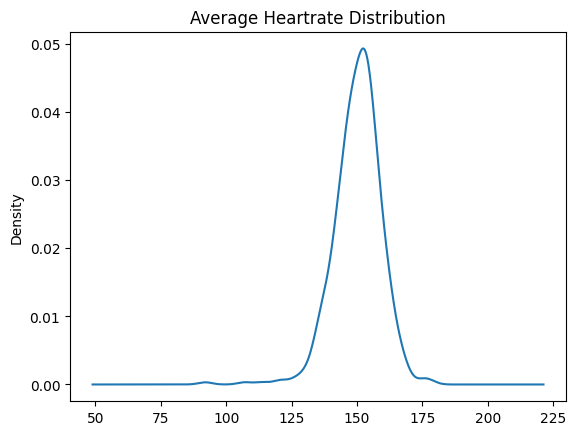

In [144]:
run_activities_encoded_2["average_heartrate"].plot(kind="kde", title="Average Heartrate Distribution")

<Axes: title={'center': 'Average Cadence Distribution'}, ylabel='Density'>

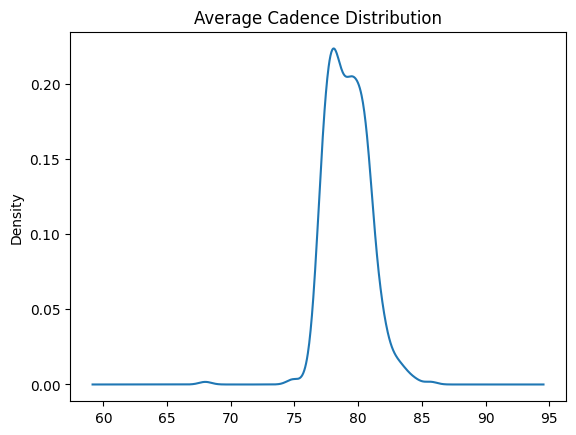

In [145]:
run_activities_encoded_2["average_cadence"].plot(kind="kde", title="Average Cadence Distribution")

<Axes: title={'center': 'Max Heartrate Distribution'}, ylabel='Density'>

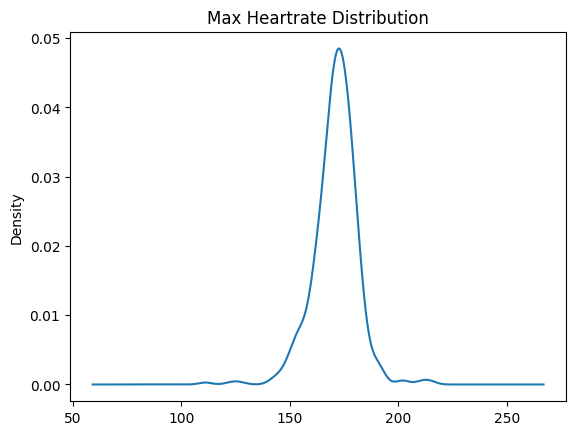

In [146]:
run_activities_encoded_2["max_heartrate"].plot(kind="kde", title="Max Heartrate Distribution")

<Axes: title={'center': 'Average Speed Distribution'}, ylabel='Density'>

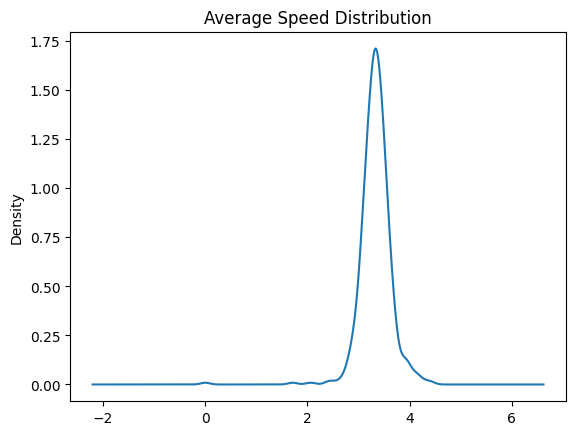

In [147]:
run_activities_encoded_2["average_speed"].plot(kind="kde", title="Average Speed Distribution")

<Axes: title={'center': 'Elevation High Distribution'}, ylabel='Density'>

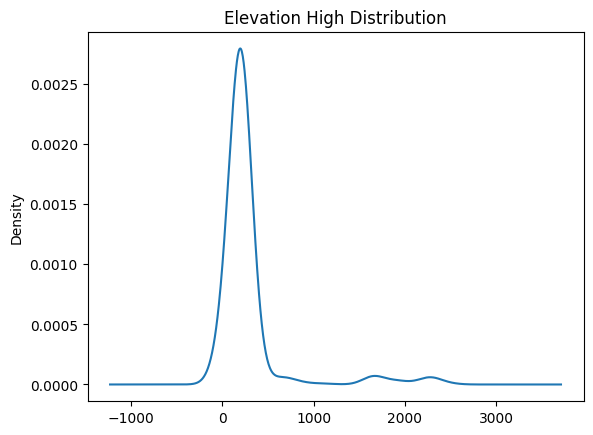

In [535]:
run_activities_encoded_2["elev_high"].plot(kind="kde", title="Elevation High Distribution")

<Axes: title={'center': 'Elevation High Distribution'}, ylabel='Density'>

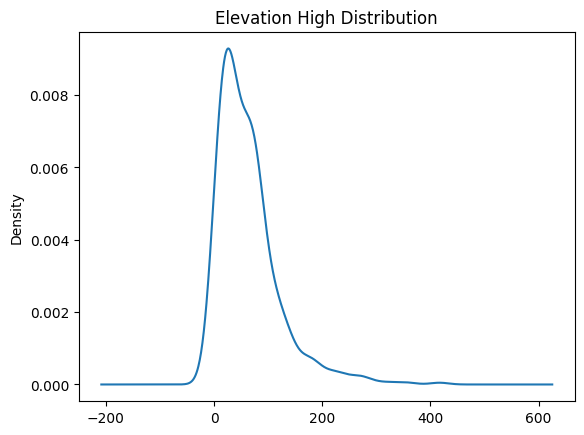

In [536]:
run_activities_encoded_2["total_elevation_gain"].plot(kind="kde", title="Elevation High Distribution")

<Axes: title={'center': 'Max Speed Distribution'}, ylabel='Density'>

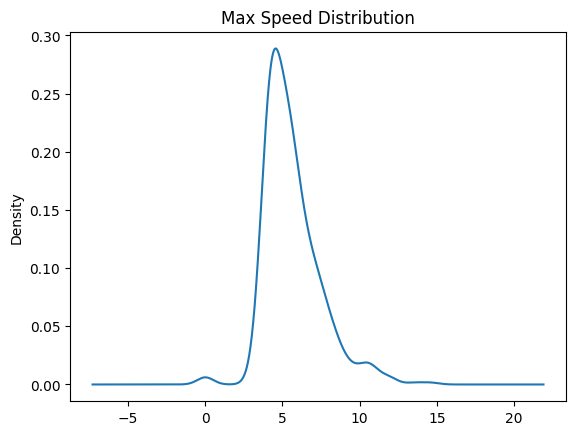

In [553]:
run_activities_encoded_2["max_speed"].plot(kind="kde", title="Max Speed Distribution")

In [134]:
run_activities_encoded_3 = z_score(run_activities_encoded_2, "average_cadence")
run_activities_encoded_3 = z_score(run_activities_encoded_2, "average_heartrate")
run_activities_encoded_3 = z_score(run_activities_encoded_2, "max_heartrate")
display(run_activities_encoded_3.head())

,start_date_local,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_cadence,average_heartrate,max_heartrate,elev_high,...,sec,total_seconds,sin_time,cos_time,month_sin,month_cos,day_sin,day_cos,sec_sin,sec_cos
0,2023-11-11,42360.6,10966,198.3,3.863,5.750,2.279121,168.0,191.0,84.1,...,10,25210,0.965737,-0.259521,-0.5,0.866025,0.790776,-0.612106,0.965737,-0.259521
1,2023-11-11,1158.2,422,0.0,2.745,8.052,3.888023,113.5,123.0,54.8,...,0,23160,0.993572,-0.113203,-0.5,0.866025,0.790776,-0.612106,0.993572,-0.113203
2,2023-11-10,6463.0,2128,55.5,3.037,4.041,2.994189,145.8,165.0,84.7,...,33,35553,0.527883,-0.849317,-0.5,0.866025,0.897805,-0.440394,0.527883,-0.849317
3,2023-11-08,8868.7,2791,100.8,3.178,5.486,0.908574,147.2,164.0,203.2,...,36,48576,-0.381070,-0.924546,-0.5,0.866025,0.998717,-0.050649,-0.381070,-0.924546
4,2023-11-07,14664.8,4163,138.5,3.523,7.044,1.623642,153.4,178.0,186.0,...,39,60759,-0.957130,-0.289658,-0.5,0.866025,0.988468,0.151428,-0.957130,-0.289658


In [42]:
# handle via KNN
print(run_activities.dtypes)
knn_imputer = KNN()
run_activities_knn = knn_imputer.fit_transform(run_activities)
print(run_activities_knn.isnull().sum())

start_date_local         object
distance                float64
moving_time               int64
total_elevation_gain    float64
type                     object
average_speed           float64
max_speed               float64
average_cadence         float64
average_heartrate       float64
max_heartrate           float64
elev_high               float64
start_time               object
start_lat               float64
start_lng               float64
weather_station          object
avg_temp                float64
dtype: object


TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [466]:
def get_weather(min_date, max_date, loc_df, df):
    # Get unique list of weather stations from locations
    print("Retrieving list of weather stations...")
    weather_stations = pd.DataFrame()
    loc_dict = {}
    for location in loc_df:
        stations = Stations()
        nearby_station = stations.nearby(location[0], location[1]).fetch(1)
        #print("location:",location)
        #print(str(location[0])+" "+str(location[1]))
        loc_dict[("[ "+str(location[0])+" "+str(location[1])+"]")] = nearby_station.index[0]
        weather_stations = pd.concat([weather_stations, nearby_station])

    weather_stations = weather_stations.drop_duplicates(subset='name')
    print("Weather stations retrieved.")
    display(weather_stations.head())
    
    # Retrieving Weather Data from Nearby Stations
    # Create dictionary to hold dataframes of weather data. Dict key is weather station id.
    print("Retrieving weather data...")
    weather_df_dict = {}
    for coord, station_id in loc_dict.items():
        weather_df_dict[station_id] = pd.DataFrame()
    
    # Retrieve at least a year of weather data
    today = date.today()
    last_year = today.year - 1
    a_year_ago_today = date(last_year, today.month, today.day)
    if a_year_ago_today < min_date:
        min_date = a_year_ago_today

    for idx, station in weather_stations.iterrows():
        # Daily Weather
        weather_df_dict[idx] = Daily(idx, start=datetime.combine(min_date, datetime.min.time()), end=datetime.combine(max_date, datetime.min.time())).fetch()

        # Hourly Weather
        #weather_df_dict[idx] = Hourly(idx, start=datetime.combine(min_date, datetime.min.time()), end=datetime.combine(max_date, datetime.min.time())).fetch()
    print("Weather data retrieved.")
    
    # Add weather data to loc_df
    print("Adding weather data to df...")
    
    # Add weather data to run_activities dataframe
    df["weather_station"] = None
    df["avg_temp"] = None

    for idx, activity in df.iterrows():
        dict_key = "[ " + str(activity['start_lat']) + " " + str(activity['start_lng']) + "]"
        if dict_key in loc_dict:
            weather_df = weather_df_dict[loc_dict[dict_key]]
            # check if date is in the future
            if today < activity["start_date_local"]:
                # if date is in future, use weather from last year
                new_date = date(activity["start_date_local"].year - 1, activity["start_date_local"].month, activity["start_date_local"].day)
                try:
                    df.at[idx,"weather_station"] = loc_dict[dict_key]
                    df.at[idx,"avg_temp"] = weather_df.loc[str(new_date)]["tavg"]
                except:
                    # weather not found for date / station
                    df.at[idx,"weather_station"] = loc_dict[dict_key]
            try:
                df.at[idx,"weather_station"] = loc_dict[dict_key]
                df.at[idx,"avg_temp"] = weather_df.loc[str(activity["start_date_local"])]["tavg"]
            except:
                # weather not found for date / station
                df.at[idx,"weather_station"] = loc_dict[dict_key]
    
    print("Weather data added.")
    df = df.drop(labels=["weather_station"], axis=1)
    display(df.head())
                
    return df


In [537]:
def ft_to_meters(dist_ft):
    return dist_ft * 0.3048

def miles_to_meters(dist_miles):
    return dist_miles * 1609.34

def z_score(df, col_name):
    df2 = df.copy()
    df2[col_name] = ( (df[col_name] - df[col_name].mean()) / df[col_name].std() )
    return df2

def normalize(df, col_name):
    df2 = df.copy()
    df2[col_name] = ( (df2[col_name] - df2[col_name].min()) / (df2[col_name].max() - df2[col_name].min()) )
    return df2

In [564]:
def data_encoding(df):
    df_encoded = df
    
    # encode time cyclically
    # split date time into seperate columns
    df_encoded.loc[:,"date-time"] = pd.to_datetime(df_encoded.start_date_local.astype(str)+ " " + df_encoded.start_time.astype(str ))
    df_encoded["year"] = df_encoded["date-time"].dt.year
    df_encoded["month"] = df_encoded["date-time"].dt.month
    df_encoded["day"] = df_encoded["date-time"].dt.day
    df_encoded["hour"] = df_encoded["date-time"].dt.hour
    df_encoded["min"] = df_encoded["date-time"].dt.minute
    df_encoded["sec"] = df_encoded["date-time"].dt.second
    df_encoded["total_seconds"] = df_encoded["hour"]*60*60 +  df_encoded["min"]*60 +  df_encoded["sec"]
    
    # cyclically encode date and time with sin / cos functions
    seconds_in_day = 24*60*60

    df_encoded["month_sin"] = np.sin(2*np.pi*df_encoded.month/12)
    df_encoded["month_cos"] = np.cos(2*np.pi*df_encoded.month/12)

    df_encoded["day_sin"] = np.sin(2*np.pi*df_encoded.day/31)
    df_encoded["day_cos"] = np.cos(2*np.pi*df_encoded.day/31)

    df_encoded["sec_sin"] = np.sin(2*np.pi*df_encoded.total_seconds/seconds_in_day)
    df_encoded["sec_cos"] = np.cos(2*np.pi*df_encoded.total_seconds/seconds_in_day)

    #df_encoded.plot.scatter("sec_sin", "sec_cos").set_aspect("equal")
    #df_encoded.plot.scatter("day_sin", "day_cos").set_aspect("equal")
    #df_encoded.plot.scatter("month_sin", "month_cos").set_aspect("equal")
    
    # one-hot encode year
    one_hot_year = pd.get_dummies(df_encoded["year"])
    df_encoded = df_encoded.join(one_hot_year)
    
    # normalize or standardize numeric columns based on distribution of values (normal or not)
    df_encoded = z_score(df_encoded, "average_cadence")
    df_encoded = z_score(df_encoded, "average_heartrate")
    df_encoded = z_score(df_encoded, "max_heartrate")
    df_encoded = normalize(df_encoded, "total_elevation_gain")
    df_encoded = normalize(df_encoded, "elev_high")
    df_encoded = normalize(df_encoded, "max_speed")
    
    # drop uncoded columns
    df_encoded = df_encoded.drop(columns=["date-time","year","month","day","hour","min","sec","total_seconds"])
    
    
    
    return df_encoded

In [579]:
def handle_nulls(df, method):
    print("How many nulls?")
    print(df.isnull().sum())
    if method == "interpolation":
        df = df.interpolate()
        return df
    elif method == "knn":
        df["start_date_local"] = str(df["start_date_local"])
        knn_imputer = KNN()
        df = knn_imputer.fit_transform(df)
        #print(run_activities_knn.isnull().sum())
        df['start_date_local'] = pd.to_datetime(df['start_date_local'])
        return df

In [580]:
def data_preprocessing(df):
    cols = ['start_date_local', 'start_latlng', 'distance', 'moving_time',  'total_elevation_gain', 'max_speed',
            'average_cadence', 'average_heartrate', 'max_heartrate', 'elev_high', 'race']
    df = df[cols]
    
    # modify date/time/location columns
    df['start_date_local'] = pd.to_datetime(df['start_date_local'])
    df['start_time'] = df['start_date_local'].dt.time
    df['start_date_local'] = df['start_date_local'].dt.date
    df['start_lat'] = round(df['start_latlng'].str[0], 2)
    df['start_lng'] = round(df['start_latlng'].str[1], 2)
    df = df.drop(columns=['start_latlng'])
    
    # add weather data
    # if date is in future (i.e. for race prediction), get the weather from that location last year
    min_date, max_date = df['start_date_local'].min(), df['start_date_local'].max()
    locations = df.loc[:,['start_lat', 'start_lng']].drop_duplicates().values
    
    #df = handle_nulls(df, "interpolation")
    df = handle_nulls(df, "knn")
    #df = get_weather(min_date, max_date, locations, df)
    df = handle_nulls(df, "interpolation") # call handle_nulls again to take care of any missing weather data
    df = data_encoding(df)
    
    df = df 
    
    return df
    

In [581]:
# Model predicts moving time / average pace during a race based on race's location, elevation, and distance.
def race_predictor(model_training_df, input_param_dict):
    # Verify format of input parameters - race_date, start_latlng, distance, elev_gain, elev_high
    if len(input_param_dict) < 5:
        print("Missing input parameters. race_predictor is expecting a dictionary with keys: race_date, start_latlng, distance, elev_gain, elev_high.")
        return
    
    input_df = pd.DataFrame( {
        "start_date_local": [input_param_dict["race_date"]],
        "start_latlng": [input_param_dict["start_latlng"]],
        "distance":  [miles_to_meters(input_param_dict["distance_miles"])],
        "moving_time": [None],
        "total_elevation_gain": [ft_to_meters(input_param_dict["elev_gain_ft"])],
        "average_speed": [None],
        "type": "Run",
        "max_speed": [None],
        "average_cadence": [None],
        "average_heartrate": [None],
        "max_heartrate": [None],
        "elev_high": [ft_to_meters(input_param_dict["elev_high_ft"])],
        "race": True}
                            
        )
    
    #model_training_df = data_preprocessing(model_training_df)
    #input_df = data_preprocessing(input_df)
    
    
    #display(model_training_df)
    #display(model_training_df.isnull().sum())
    #display(input_df.isnull().sum())
    display(data_preprocessing(model_training_df))
    return input_df

In [582]:
empty_df = pd.DataFrame(columns=['start_date_local', 'start_latlng', 'distance', 'moving_time',  'total_elevation_gain', 'type', 
        'max_speed','average_cadence', 'average_heartrate', 'max_heartrate', 'elev_high'])

richmond_marathon_input_dict = {
        "race_date": "2023-11-11T07:00:00Z",
        "start_latlng": [37.5407, -77.4360],
        "distance_miles": 26.2,
        "elev_gain_ft": 490,
        "elev_high_ft": 272
}

seattle_15k_input_dict = {
        "race_date": "2023-11-23T09:30:00Z",
        "start_latlng": [47.6798, -122.2536],
        "distance_miles": 9.32,
        "elev_gain_ft": 342,
        "elev_high_ft": 67
}
# only keep run activties
running_activities = activities.loc[activities["type"] == "Run"]
running_activities = running_activities.drop(columns=["type"])
running_activities["race"] = False

# manually mark race activities as "race"=True
# Races: 11-11-2023 , 2-19-2023, 1-22-2023, 2-27-2022, 1-23-2022, 5-6-2023, 11-24-2022, 12-4-2022
# Relays: 3-28-2021, 3-27-2021, 3-27-2021, 3-26-2023, 3-25-2023, 3-25-2023, 8-26-2023, 8-25-2023, 8-25-2023
# NOT in current data pull -  1-23-2022, 2-27-2022, 3-28-2021, 3-27-2021, 3-27-2021
race_activity_ids = [10201538669,8589932304,8434045492,"fakeID",9022328776,8162552673,8207198428]
relay_activity_ids = [8779880223,8777939900,8776825449,9721567283,9719999180,9725419043]

# uncomment to locate race activities and retrieve ids
#display(running_activities.loc[(pd.to_datetime(running_activities["start_date_local"])).dt.date == date(2023,8,26)])

for id in race_activity_ids:
        running_activities.loc[running_activities.id == id, "race"] = True
            

#display(running_activities.loc[running_activities["race"] == True])

#race_predictor(activities, richmond_marathon_input_dict)
race_predictor(running_activities, seattle_15k_input_dict)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

How many nulls?
start_date_local         0
distance                 0
moving_time              0
total_elevation_gain     0
max_speed                0
average_cadence         16
average_heartrate       15
max_heartrate           15
elev_high                7
race                     0
start_time               0
start_lat                7
start_lng                7
dtype: int64


ValueError: could not convert string to float: '0      2023-11-11\n1      2023-11-11\n2      2023-11-10\n3      2023-11-08\n4      2023-11-07\n          ...    \n194    2022-03-18\n196    2022-03-17\n197    2022-03-16\n198    2022-03-15\n199    2022-03-14\nName: start_date_local, Length: 505, dtype: object'